<a href="https://colab.research.google.com/github/mrityunjay2627/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Web scraping is, essentially, the practice of substituting a web browser for an application of your own design. Because of this, it’s important to understand the standards and frameworks that web browsers are built on. As a web scraper, you must both mimic and, at times, subvert the expected internet customs and practices.**

### Web Scraping Freestyle Tryout

urllib is a standard Python library and contains functions for requesting data across the web, handling cookies, and even changing metadata such as headers and your user agent. We will be using urllib extensively throughout the book, so I recommend you read the Python documentation for the library.

urlopen is used to open a remote object across a network and read it. Because it is a fairly generic function (it can read HTML files, image files, or any other file stream with ease), it will be used quite frequently.

In [ ]:
from urllib.request import urlopen

html = urlopen('http://pythonscraping.com/pages/page3.html')
print(html.read())

b'<!DOCTYPE html><html lang="en"><head>\n\t\t<script src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js"  type="text/javascript" charset="UTF-8" data-domain-script="7e5bc3d6-ef20-4760-aa0d-c8df4649fae2" ></script>\n\t\t\n\t\t<script>\n\t\t\twindow.__uspapi = function (command, version, callback) {\n\t\t\t\tcallback({}, false);\n\t\t\t}\n\t\t</script>\n\t\n\t<!-- Server: customer-pages-map-dp --><!-- Time generated: Wed Feb 12 2025 04:06:50 GMT+0000 (Coordinated Universal Time) --><script>(function(a){window.__reactServerOnClickHandler=function(i){(a[i]=a[i]||[]).push(window.event)}})(window.__reactServerUnhandledEvents={})</script><script>\n/*! LAB.js (LABjs :: Loading And Blocking JavaScript)\n    v2.0.3 (c) Kyle Simpson\n    MIT License\n*/\n!function(t){function e(e){if(t.fetch){var n="The following resources did not resolve within "+p+" ms: "+e,r=JSON.stringify({count:1,errors:[[n]]});t.fetch("/corv/beacon/error",{method:"post",body:"b-"+r})}}function n(t,e){l.push([t,+(e|

In [ ]:
# from urllib.request import Request, urlopen

# url = 'https://www.zillow.com/tempe-az/'
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

# req = Request(url, headers=headers)
# html = urlopen(req).read()

# print(html.decode('utf-8'))  # Decode to string


In [ ]:
# import requests

# url = 'https://www.zillow.com/tempe-az/'
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'}

# response = requests.get(url, headers=headers)

# if response.status_code == 200:
#     print(response.text)
# else:
#     print(f"Failed to fetch page, status code: {response.status_code}")


In [ ]:
# !pip3 install selenium webdriver-manager

In [ ]:
# # Step 1: Install Chromium and ChromeDriver
# !apt update
# !apt install -y chromium-chromedriver

# # Step 2: Set up environment variables
# import os
# os.environ["CHROME_BINARY"] = "/usr/bin/chromium-browser"
# os.environ["PATH"] += os.pathsep + "/usr/bin/"

# # Step 3: Import Selenium and Set Up WebDriver
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service

# options = webdriver.ChromeOptions()
# options.binary_location = "/usr/bin/chromium-browser"
# options.add_argument("--headless")  # Run in headless mode
# options.add_argument("--no-sandbox")
# options.add_argument("--disable-dev-shm-usage")

# # Step 4: Correct WebDriver Path
# driver = webdriver.Chrome(service=Service("/usr/bin/chromedriver"), options=options)

# # Step 5: Open Zillow (or any website)
# driver.get("https://www.zillow.com")

# print(driver.page_source[:1000])  # Print first 1000 characters of the page source
# driver.quit()


In [ ]:
# !pip3 install httpx parsel loguru

In [ ]:
# !pip3 install httpx[http2]

In [ ]:
# import asyncio
# from typing import List
# import httpx
# import json
# from parsel import Selector

# client = httpx.AsyncClient(
#     # enable http2
#     http2=True,
#     # add basic browser like headers to prevent being blocked
#     headers={
#         "accept-language": "en-US,en;q=0.9",
#         "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",
#         "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
#         "accept-language": "en-US;en;q=0.9",
#         "accept-encoding": "gzip, deflate, br",
#     },
# )

# async def scrape_properties(urls: List[str]):
#     """scrape zillow property pages for property data"""
#     to_scrape = [client.get(url) for url in urls]
#     results = []
#     for response in asyncio.as_completed(to_scrape):
#         response = await response
#         assert response.status_code == 200, "request has been blocked"
#         selector = Selector(response.text)
#         data = selector.css("script#__NEXT_DATA__::text").get()
#         if data:
#             # Option 1: some properties are located in NEXT DATA cache
#             data = json.loads(data)
#             property_data = json.loads(data["props"]["pageProps"]["componentProps"]["gdpClientCache"])
#             property_data = property_data[list(property_data)[0]]['property']
#         else:
#             # Option 2: other times it's in Apollo cache
#             data = selector.css("script#hdpApolloPreloadedData::text").get()
#             data = json.loads(json.loads(data)["apiCache"])
#             property_data = next(
#                 v["property"] for k, v in data.items() if "ForSale" in k
#             )
#         results.append(property_data)
#     return results

# async def run():
#     data = await scrape_properties(
#             ["https://www.zillow.com/homedetails/1625-E-13th-St-APT-3K-Brooklyn-NY-11229/245001606_zpid/"]
#         )
#     print(json.dumps(data, indent=2))
# if __name__ == "__main__":
#     asyncio.run(run())

BeautifulSoup tries to make sense of the nonsensical; it helps format and organize the messy web by fixing bad HTML and presenting us with easily traversable Python objects representing XML structures.

In [ ]:
!pip3 install bs4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'html.parser')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


In [ ]:
print(bs.html.body.h1)
print(bs.body.h1)
print(bs.html.h1)

<h1>Totally Normal Gifts</h1>
<h1>Totally Normal Gifts</h1>
<h1>Totally Normal Gifts</h1>


Another popular parser is lxml. lxml has some advantages over html.parser in that it is generally better at parsing “messy” or malformed HTML code. It is forgiving and fixes problems like unclosed tags, tags that are improperly nested, and missing head or body tags.

lxml is also somewhat faster than html.parser, although speed is not necessarily an advantage in web scraping, given that the speed of the network itself will almost always be your largest bottleneck.

Avoid Over-Optimizing Web Scraping Code
Elegant algorithms are lovely to behold, but when it comes to web scraping, they may not have a practical impact. A few microseconds of processing time will likely be dwarfed by the—sometimes actual—seconds of network latency that a network request takes.

Good web scraping code generally focuses on robust and easily readable implementations, rather than clever processing optimizations.

One of the disadvantages of lxml is that it needs to be installed separately and depends on third-party C libraries to function. This can cause problems for portability and ease of use, compared to html.parser.

In [ ]:
!pip3 install lxml

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'lxml')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


Another popular HTML parser is html5lib. Like lxml, html5lib is an extremely forgiving parser that takes even more initiative with correcting broken HTML. It also depends on an external dependency and is slower than both lxml and html.parser. Despite this, it may be a good choice if you are working with messy or handwritten HTML sites.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
# bs = BeautifulSoup(html.read(), 'html.parser')
bs = BeautifulSoup(html, 'html5lib')
print(bs.h1)

<h1>Totally Normal Gifts</h1>


Searching for tags by attributes, working with lists of tags, and navigating parse trees.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html.read(), 'html.parser')

Using this BeautifulSoup object, you can use the find_all function to extract a Python list of proper nouns found by selecting only the text within tags.

.get_text() strips all tags from the document you are working with and returns a Unicode string containing the text only. For example, if you are working with a large block of text that contains many hyperlinks, paragraphs, and other tags, all those will be stripped away, and you’ll be left with a tagless block of text.

In [ ]:
nameList = bs.find_all(name='span', attrs={'class':['red','green']})
for name in nameList:
    print(name.get_text())

In [ ]:
nameList = bs.find_all(string='the prince')
print(len(nameList))

7


In [ ]:
title = bs.find_all(id='title', class_='text') # Since 'class' method is reserved in Python, we use class_ in bs4
title

[]

The find_all function is responsible for finding tags based on their name and attributes. But what if you need to find a tag based on its location in a document? That’s where tree navigation comes in handy

In the BeautifulSoup library, as well as many other libraries, there is a distinction drawn between children and descendants: much like in a human family tree, children are always exactly one tag below a parent, whereas descendants can be at any level in the tree below a parent. For example, the tr tags are children of the table tag, whereas tr, th, td, img, and span are all descendants of the table tag (at least in our example page). All children are descendants, but not all descendants are children.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

"""
This code prints the list of product rows in the giftList table, including the initial row of column labels.
If you were to write it using the descendants() function instead of the children() function, about two dozen tags would be found within the table and printed, including img tags, span tags, and individual td tags.
It’s definitely important to differentiate between children and descendants!
"""

for child in bs.find('table',{'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


The BeautifulSoup next_siblings() function makes it trivial to collect data from tables, especially ones with title rows

As a complement to next_siblings, the previous_siblings function often can be helpful if there is an easily selectable tag at the end of a list of sibling tags that you would like to get.

And, of course, there are the next_sibling and previous_sibling functions, which perform nearly the same function as next_siblings and previous_siblings, except they return a single tag rather than a list of them.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

"""
The output of this code is to print all rows of products from the product table, except for the first title row. Why does the title row get skipped?
Objects cannot be siblings with themselves. Anytime you get siblings of an object, the object itself will not be included in the list.
As the name of the function implies, it calls next siblings only. If you were to select a row in the middle of the list, for example, and call next_siblings on it, only the subsequent siblings would be returned.
So, by selecting the title row and calling next_siblings, you can select all the rows in the table without selecting the title row itself.
"""

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)

When scraping pages, you will likely discover that you need to find parents of tags less frequently than you need to find their children or siblings. Typically, when you look at HTML pages with the goal of crawling them, you start by looking at the top layer of tags, and then figure out how to drill your way down into the exact piece of data that you want. Occasionally, however, you can find yourself in odd situations that require BeautifulSoup’s parent-finding functions, .parent and .parents.

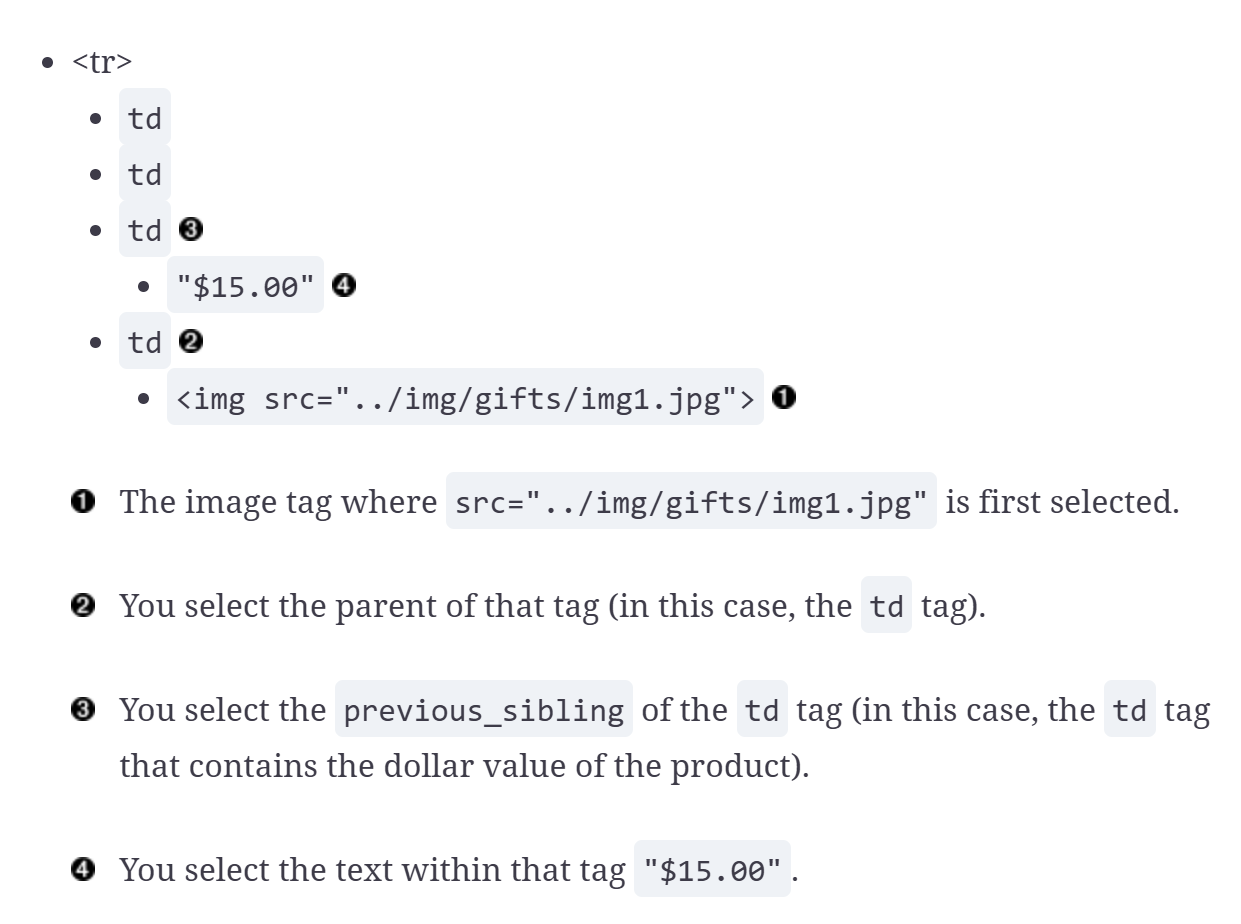

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



#### Regex

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img',
    {'src':re.compile(r'..\/img\/gifts/img.*.jpg')})
for image in images:
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


So far, you’ve looked at how to access and filter tags and access content within them. However, often in web scraping you’re not looking for the content of a tag; you’re looking for its attributes. This becomes especially useful for tags such as a, where the URL it is pointing to is contained within the href attribute; or the img tag, where the target image is contained within the src attribute.

In [ ]:
bs.img.attrs,bs.img.attrs['src'],bs.img.attrs['style']

({'src': '../img/gifts/logo.jpg', 'style': 'float:left;'},
 '../img/gifts/logo.jpg',
 'float:left;')

Lambda Expression

In [ ]:
bs.find_all(lambda tag: len(tag.attrs) == 2) # All the tags which have 2 attributes like <img src="../img/gifts/logo.jpg" style="float:left;"/> (src and style are 2 attributes of img tag)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

### Urllib

In [1]:
from urllib.request import urlopen

In [2]:
url = "https://quotes.toscrape.com/"

In [3]:
resp = urlopen(url)

In [4]:
resp

In [5]:
resp.status

200

In [6]:
content = resp.read()

In [8]:
content # We get the byte string (Notice 'b' prefix in the beginning)

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinki

In [10]:
content.decode('utf-8') # content decoded to string

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\

In [11]:
print(content.decode('utf-8')) # To get indentation right

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

In [12]:
with urlopen(url) as resp:
   content = resp.read()
   print(content.decode('utf-8'))

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

### Requests (Better than Urllib)

In [13]:
# !pip3 install requests

In [14]:
import requests

In [15]:
resp = requests.get(url)

In [16]:
resp

<Response [200]>

In [18]:
resp.status_code

200

In [19]:
resp.content # Byte String

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinki

In [20]:
print(resp.content.decode('utf-8'))

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
    
    
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="auth

In [21]:
resp.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n    \n    \n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\

In [23]:
type(resp)

requests.models.Response

### Setting Headers

In [22]:
resp.headers

{'Date': 'Fri, 14 Feb 2025 23:21:58 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '11064', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=0; includeSubDomains; preload'}

In [24]:
resp.headers['Content-Type'] # Keys are case insensitive

'text/html; charset=utf-8'

In [25]:
resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})

In [28]:
resp = requests.get("https://httpbin.org/headers")

In [30]:
resp.json()

{'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afd200-03395243714962ff021c4618'}}

In [31]:
resp = requests.get("https://httpbin.org/headers", headers={"User-Agent": "Mozilla/5.0"})

In [32]:
resp.json()

{'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Host': 'httpbin.org',
  'User-Agent': 'Mozilla/5.0',
  'X-Amzn-Trace-Id': 'Root=1-67afd22a-7321f07671e7261f2cc020f2'}}

In [33]:
resp.request.headers

{'User-Agent': 'Mozilla/5.0', 'Accept-Encoding': 'gzip, deflate, zstd', 'Accept': '*/*', 'Connection': 'keep-alive'}

### Query Parameters

Eg. books.com?author=JKRowling&title=HarryPotter&price=10

In [35]:
url = "https://api.coinbase.com/v2/exchange-rates?currency=BTC"

In [36]:
import requests as r

In [38]:
resp = r.get(url)

In [39]:
resp.json()

{'data': {'currency': 'BTC',
  'rates': {'00': '3089134.072900158474682188',
   '1INCH': '358976.721915285452884244',
   'AAVE': '370.4389701796629005',
   'ABT': '106644.2499179341283538',
   'ACH': '3771756.191950464397672836',
   'ACS': '53417105.587679153763095934',
   'ACX': '283650.11641443539350562',
   'ADA': '121654.5012165450121655',
   'AED': '357981.83582036824336613',
   'AERGO': '1068078.684931506849715598',
   'AERO': '113837.073894329885117848',
   'AFN': '7155653.802543661604199972',
   'AGLD': '82479.735962425423047608',
   'AIOZ': '213218.507985123602199424',
   'AKT': '50577.156201349245481596',
   'ALCX': '7414.391783948273129744',
   'ALEO': '221504.954545454542796486',
   'ALEPH': '1041262.606837606841438684',
   'ALGO': '328947.3684210526315789',
   'ALICE': '124631.94373401534128032',
   'ALL': '9224995.90360749180079478',
   'AMD': '38872225.01743164',
   'AMP': '16774901.8932874354569489',
   'ANG': '174817.750769583414294356',
   'ANKR': '4138521.44373673036

In [41]:
resp.json()['data']['rates']['USD']

'97462.18'

In [43]:
url = "https://api.coinbase.com/v2/exchange-rates"
params = {'currency':'BTC'}

In [44]:
resp = r.get(url, params=params)

In [46]:
resp.json()['data']['rates']['USD']

'97392.865'

In [47]:
url = "https://api.sunrisesunset.io/json"

In [56]:
params = {
    "lat": 43.6532,
    "lng": -79.3832,
    "timezone": "EST",
    "date": "today"
}
headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36"
}

In [57]:
resp = r.get(url, params=params, headers=headers)

In [58]:
resp.request.url

'https://api.sunrisesunset.io/json?lat=43.6532&lng=-79.3832&timezone=EST&date=today'

In [59]:
resp.json()

{'results': {'date': '2025-02-14',
  'sunrise': '7:20:13 AM',
  'sunset': '5:46:05 PM',
  'first_light': '5:43:40 AM',
  'last_light': '7:22:37 PM',
  'dawn': '6:50:37 AM',
  'dusk': '6:15:41 PM',
  'solar_noon': '12:33:09 PM',
  'golden_hour': '5:05:33 PM',
  'day_length': '10:25:52',
  'timezone': 'EST',
  'utc_offset': -300},
 'status': 'OK'}

### Authentication And Authorization

Authentication: Who we are

Authorization: What we can do, given who we are

In [60]:
API_KEY = "YOUR_API_KEY_HERE"

In [61]:
url = "https://api.exchange.coinbase.com/fills"

In [62]:
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

In [66]:
# Not Authorized
r.get(url, headers=headers) # 500 Internal Servor Error since we don't actually have an API Key and are hence not authorized

<Response [500]>

In [71]:
# Basic authentication
auth = ("user1","pass1")
url = "https://www.httpbin.org/basic-auth/user1/pass1"
r.get(url, auth=auth) # Password Matches

<Response [200]>

In [70]:
auth = ("user1","pass1")
url = "https://www.httpbin.org/basic-auth/user1/pass2"
r.get(url, auth=auth) # Password doesn't match

<Response [401]>

### Aside From GET

In [72]:
import requests as r

In [74]:
r.delete("https://www.httpbin.org/delete").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afd917-4b5f123a2933843946a503ee'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/delete'}

In [75]:
r.patch("https://www.httpbin.org/patch").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afd95d-686633cc674486556f07b7d4'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/patch'}

In [76]:
r.put("https://www.httpbin.org/put").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afd96e-4eb918225288e65f32f48b9c'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/put'}

In [77]:
r.post("https://www.httpbin.org/post").json()

{'args': {},
 'data': '',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '0',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afd97d-564f76a93eaffda67362de6f'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/post'}

### POSTing Data

Client sends data to server via:

1. headers
2. query params
3. body

We have seen headers and query params. Now, we will see body

In [83]:
resp = r.post("https://www.httpbin.org/post",
              data={
                  'key1':'value1',
                  'key2':'a value with spaces and apostrophe "'
                })
resp.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'a value with spaces and apostrophe "'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '55',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afdade-7c293c1f7978c67902042c51'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/post'}

In [84]:
resp.request.body

'key1=value1&key2=a+value+with+spaces+and+apostrophe+%22'

In [85]:
resp = r.post("https://www.httpbin.org/post",
              data="some text")
resp.json()

{'args': {},
 'data': 'some text',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '9',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afdb0e-5fecb08063d4a3a75180888c'},
 'json': None,
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/post'}

In [86]:
resp.request.body

'some text'

In [87]:
resp = r.post("https://www.httpbin.org/post",
              json={
                  'key1':'value1',
                  'key2':'a value with spaces and apostrophe "'
                })
resp.json()

{'args': {},
 'data': '{"key1": "value1", "key2": "a value with spaces and apostrophe \\""}',
 'files': {},
 'form': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, zstd',
  'Content-Length': '67',
  'Content-Type': 'application/json',
  'Host': 'www.httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-67afdb24-5b6b516348f8bb2270762f5d'},
 'json': {'key1': 'value1', 'key2': 'a value with spaces and apostrophe "'},
 'origin': '34.16.170.124',
 'url': 'https://www.httpbin.org/post'}

In [88]:
resp.request.body

b'{"key1": "value1", "key2": "a value with spaces and apostrophe \\""}'